# EDA Report: Supply Chain Dataset
## 1. Introduction & Objective
This is my first project using Jupyter Notebook and also my first hands-on project in Exploratory Data Analysis (EDA). The main goal here is to get comfortable working with real-world data - cleaning it, exploring it, and pulling out useful insights.

The dataset I’m using is from Kaggle, titled “Supply Chain Analysis” ([source here](https://www.kaggle.com/datasets/amirmotefaker/supply-chain-dataset/data)). It includes key logistics variables like stock levels, shipping times, order quantities, and costs to get a good feel for what’s going on inside a supply chain.

This project is mainly for learning purposes, but I still aim to make it practical. I want to find patterns, detect possible inefficiencies, and basically understand how things are flowing - supplier-wise, product-wise, and across the board.

---
## 2. Data overview
Before starting the analysis, it’s important to note that the original dataset lacks official documentation or detailed column descriptions. As a result, I had to infer the meaning of certain fields based on the data values and context. 

For instance, the `Availability` column contains numerical values. Since no description was provided, I interpreted it as an indicator of forecasted availability, likely derived from demand planning.  

To simplify the analysis, I grouped the dataset’s columns into three functional categories:

### 2.1 Products & Sales

These fields relate to product information and performance:

- `Product type`: Category of the product (e.g., haircare, skincare)  
- `SKU`: Unique identifier for each product  
- `Price`: Unit price of the item  
- `Availability`: Numerical value, assumed to represent forecasted availability  
- `Number of products sold`: Quantity sold over a given period  
- `Revenue generated`: Total sales revenue  
- `Customer demographics`: Gender or other customer attributes  
- `Stock levels`: Inventory currently available  

### 2.2 Shipping & Logistics

These columns capture the transportation and distribution aspects:

- `Order quantities`: Number of items per order  
- `Lead times`: Time taken to receive items from suppliers  
- `Shipping times`: Duration from dispatch to customer delivery  
- `Shipping carriers`: Names of the delivery service providers  
- `Shipping costs`: Cost associated with delivery  
- `Location`: Distribution or warehouse location  
- `Transportation modes`: Method of transport (e.g., air, road)  
- `Routes`: Delivery paths  
- `Costs`: Comprehensive cost including logistics and warehousing  


### 2.3 Manufacturing

These variables focus on the production side of the supply chain:

- `Supplier name`: Supplier or vendor providing goods/materials  
- `Production volumes`: Number of units produced  
- `Manufacturing lead time`: Time from raw material to finished product  
- `Manufacturing costs`: Expenses involved in production (e.g., labor, materials)  
- `Inspection results`: Quality check status (e.g., Pass, Fail)  
- `Defect rates`: Percentage of defective units 


---
## 3. Data Cleaning & Preprocessing
Before diving into deeper analysis, I performed a few basic quality checks to ensure the dataset was suitable for exploration.
### 3.1 Dataset loading
The dataset was loaded using `pandas.read_csv()`, and stored in a DataFrame for further processing. 

In [21]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt

data = pd.read_csv('supply_chain_data.csv')
df = pd.DataFrame(data)
print(df.head())

  Product type   SKU      Price  Availability  Number of products sold  \
0     haircare  SKU0  69.808006            55                      802   
1     skincare  SKU1  14.843523            95                      736   
2     haircare  SKU2  11.319683            34                        8   
3     skincare  SKU3  61.163343            68                       83   
4     skincare  SKU4   4.805496            26                      871   

   Revenue generated Customer demographics  Stock levels  Lead times  \
0        8661.996792            Non-binary            58           7   
1        7460.900065                Female            53          30   
2        9577.749626               Unknown             1          10   
3        7766.836426            Non-binary            23          13   
4        2686.505152            Non-binary             5           3   

   Order quantities  ...  Location Lead time  Production volumes  \
0                96  ...    Mumbai        29          

### 3.2 Initial Structure Review
To gain a quick overview of the dataset, I used `.shape`, `.info()`, and `.describe()`.  
These functions helped assess the dataset's size, data types, and summary statistics.  
The dataset contains **100 rows** and **24 columns**

In [22]:
df.shape

(100, 24)

I used `.info()` to confirm data types. Most columns were already in the correct format.
Numeric fields like Price, Revenue generated, Manufacturing costs, and Shipping costs were stored as floats.

In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 24 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Product type             100 non-null    object 
 1   SKU                      100 non-null    object 
 2   Price                    100 non-null    float64
 3   Availability             100 non-null    int64  
 4   Number of products sold  100 non-null    int64  
 5   Revenue generated        100 non-null    float64
 6   Customer demographics    100 non-null    object 
 7   Stock levels             100 non-null    int64  
 8   Lead times               100 non-null    int64  
 9   Order quantities         100 non-null    int64  
 10  Shipping times           100 non-null    int64  
 11  Shipping carriers        100 non-null    object 
 12  Shipping costs           100 non-null    float64
 13  Supplier name            100 non-null    object 
 14  Location                 10

I then ran `.describe()` to scan for irregular values.
Some high values were observed in Shipping costs and Manufacturing costs, but no removals were made at this stage.
These values will be further explored during the analysis phase to determine whether they represent true variance (e.g., air freight vs. sea freight).

In [24]:
df.describe()

,Price,Availability,Number of products sold,Revenue generated,Stock levels,Lead times,Order quantities,Shipping times,Shipping costs,Lead time,Production volumes,Manufacturing lead time,Manufacturing costs,Defect rates,Costs
count,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.00000,100.000000,100.000000,100.000000
mean,49.462461,48.400000,460.990000,5776.048187,47.770000,15.960000,49.220000,5.750000,5.548149,17.080000,567.840000,14.77000,47.266693,2.277158,529.245782
std,31.168193,30.743317,303.780074,2732.841744,31.369372,8.785801,26.784429,2.724283,2.651376,8.846251,263.046861,8.91243,28.982841,1.461366,258.301696
min,1.699976,1.000000,8.000000,1061.618523,0.000000,1.000000,1.000000,1.000000,1.013487,1.000000,104.000000,1.00000,1.085069,0.018608,103.916248
25%,19.597823,22.750000,184.250000,2812.847151,16.750000,8.000000,26.000000,3.750000,3.540248,10.000000,352.000000,7.00000,22.983299,1.009650,318.778455
50%,51.239831,43.500000,392.500000,6006.352023,47.500000,17.000000,52.000000,6.000000,5.320534,18.000000,568.500000,14.00000,45.905622,2.141863,520.430444
75%,77.198228,75.000000,704.250000,8253.976921,73.000000,24.000000,71.250000,8.000000,7.601695,25.000000,797.000000,23.00000,68.621026,3.563995,763.078231
max,99.171329,100.000000,996.000000,9866.465458,100.000000,30.000000,96.000000,10.000000,9.929816,30.000000,985.000000,30.00000,99.466109,4.939255,997.413450


### 3.3 Missing Value 
I used `df.isna().sum()` to check for missing values across all columns.  
Fortunately, the dataset contains **no missing values**, so no imputation or filtering was necessary.

In [25]:
df.isna().sum()

Product type               0
SKU                        0
Price                      0
Availability               0
Number of products sold    0
Revenue generated          0
Customer demographics      0
Stock levels               0
Lead times                 0
Order quantities           0
Shipping times             0
Shipping carriers          0
Shipping costs             0
Supplier name              0
Location                   0
Lead time                  0
Production volumes         0
Manufacturing lead time    0
Manufacturing costs        0
Inspection results         0
Defect rates               0
Transportation modes       0
Routes                     0
Costs                      0
dtype: int64

### 3.4 Duplicates Rows
Checked for duplicated records using **df.duplicated().sum()** and found **0** duplicate rows, so no action was needed.

In [26]:
df.duplicated().sum()

0

### 3.5 Column Redundancy
There were two similar columns: **Lead times** and **Lead time**. To avoid confusion and maintain consistency throughout the analysis, I kept only 'Lead times', which I interpreted as the delivery lead time from suppliers. The 'Lead time' column was dropped.

---
## 4. Products & Sales
### Question 1: What are the best-selling product types?

To evaluate overall sales performance, we first compare total revenue by product category. Then we drill down to identify the top individual SKUs.
#### Revenue by Product Type
We aggregate revenue by `Product type` to see which categories drive the most value:

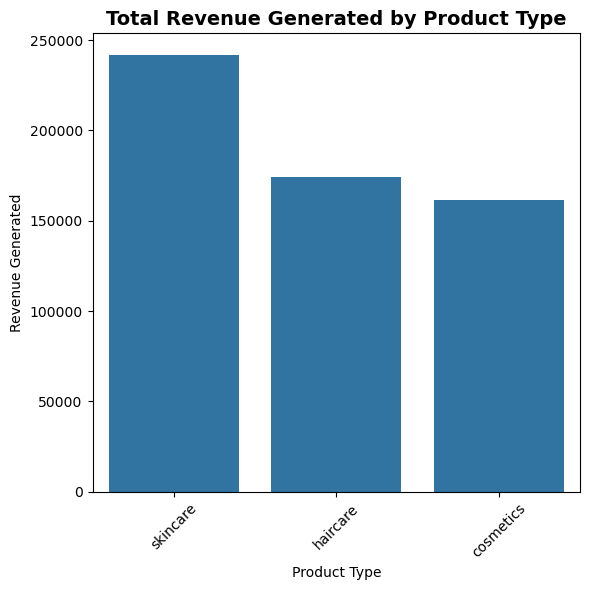

In [27]:
grouped_data = df.groupby(by='Product type')['Revenue generated'].sum().reset_index()
grouped_data = grouped_data.sort_values(by='Revenue generated', ascending=False)
plt.figure(figsize=(6, 6))
sns.barplot(data=grouped_data, x='Product type', y='Revenue generated')

plt.title('Total Revenue Generated by Product Type',fontsize=14, fontweight='bold', loc='center')
plt.xlabel('Product Type')
plt.ylabel('Revenue Generated')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

The distribution of revenue across product categories reveals that:
- **Skincare** clearly dominates, with roughly 240,000 in sales—about 40 % more than Haircare.  
- **Haircare** follows at approximately 175,000, representing a strong second place.  
- **Cosmetics**, at around 160,000, still commands a substantial share, though it trails Haircare by about 15,000.
##### <u>Refined Insight:</u>
While Skincare is the clear leader, Haircare and Cosmetics both contribute significantly; the gap between second and third is relatively small (≈9 %), suggesting Cosmetics is nearly on par with Haircare.

#### Revenue by SKU Distribution
Next, we identify which specific SKUs account for the largest revenue shares. We sort all records by `Revenue generated and plot the top 40:


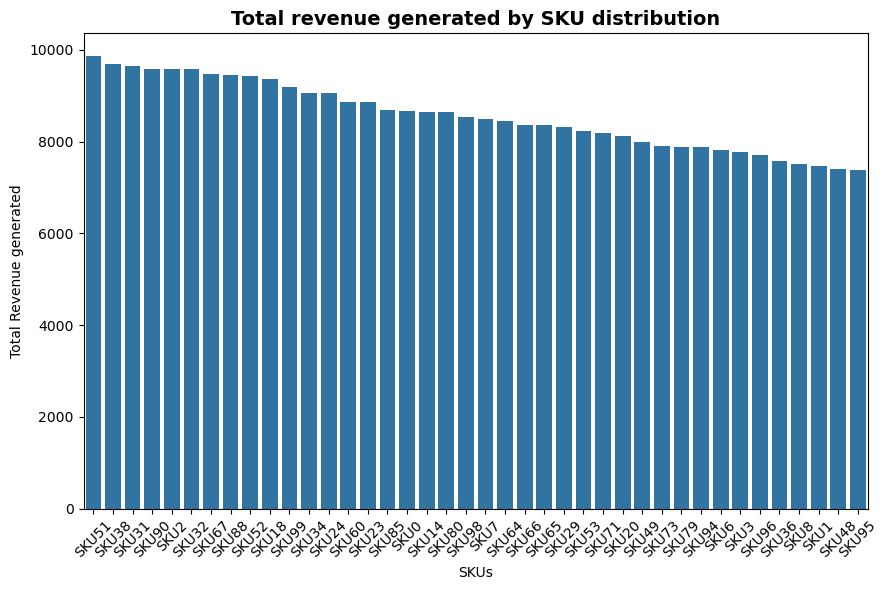

In [28]:
SKU_revenue = df.sort_values(by='Revenue generated', ascending=False)
plt.figure(figsize=(9, 6))
sns.barplot(data=SKU_revenue.head(40), x='SKU',y='Revenue generated')
plt.xlabel('SKUs')
plt.ylabel('Total Revenue generated')
plt.title('Total revenue generated by SKU distribution',fontsize=14, fontweight='bold', loc='center')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

- **SKU51** is the highest-revenue item at just under 10,000. 
- The 2nd through 10th best-selling SKUs each generate between 9,300 and 9,800 - a tight cluster suggesting no single SKU (beyond SKU51) overwhelmingly outperforms its peers.  
- The 40th SKU on this list still brings in over 7,400, indicating a relatively shallow drop-off across the top sellers.
##### <u>Refined Insight:</u>
The revenue curve is gently declining rather than steep, implying a “long tail” where many SKUs contribute meaningfully rather than a few dominating. The top 10 SKUs together account for roughly 10 % of total SKU revenue, with the remainder dispersed across the next 30 heavy hitters and beyond. 

#### Question 2: How well do forecasted Availability and actual Stock Levels align?

To assess how well our forecasted availability aligns with actual inventory, I calculate the difference between `Availability` (forecasted units) and `Stock levels` (on-hand inventory). A positive difference indicates a **Surplus**, a negative indicates a **Shortfall**, and zero means **Balanced**.

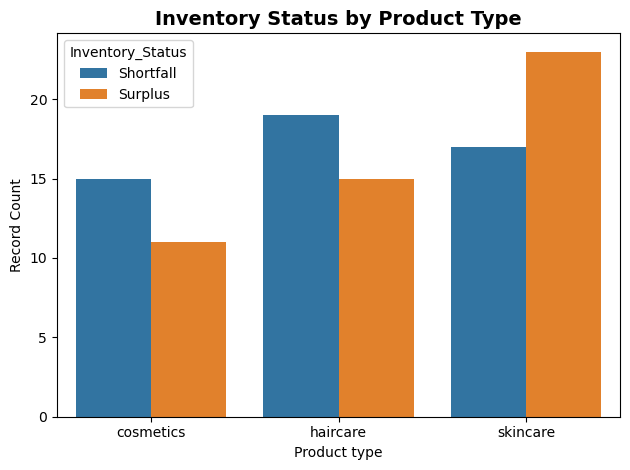

In [29]:
df['Difference'] = df['Availability'] - df['Stock levels']

conditions = [
    df['Difference'] == 0,
    df['Difference'] < 0,
    df['Difference'] > 0
]
status = ['Balanced', 'Shortfall', 'Surplus']
df['Inventory_Status'] = np.select(conditions, status)

status_count = df.value_counts(df['Inventory_Status'])
status_group = df.groupby(by='Product type')['Inventory_Status'].value_counts().reset_index(name='Record Count')

sns.barplot(data=status_group, x='Product type', y='Record Count', hue='Inventory_Status')
plt.title('Inventory Status by Product Type',fontsize=14, fontweight='bold', loc='center')
plt.tight_layout()
plt.show()

The bar chart above shows:
- **Cosmetics** and **Haircare** each have more Shortfalls than Surpluses.
- **Skincare** is the only category with more Surpluses than Shortfalls.
- No category has a large Balanced segment, indicating most SKUs are either over- or under-stocked.
  
And if we examine the **standard deviation** of the forecast errors (`Difference`) by product type, we can quantify how much variability each model exhibits:  

In [30]:
status_diff = df.groupby('Product type')['Difference'].std().reset_index()
print(status_diff)

  Product type  Difference
0    cosmetics   45.803208
1     haircare   41.482649
2     skincare   45.241793


**Haircare** shows the smallest deviation (≈41.5), whereas **Cosmetics** (≈45.8) and **Skincare** (≈45.2) are marginally higher-indicating only slight differences between categories.
##### <u>Refined Insight:</u>
Overall, these uniformly large standard deviations reveal that our forecasting models lack the precision needed across all product types, suggesting they currently do not produce reliable demand estimates.

#### Question 3: Who are our customers ?

Understanding customer demographics is essential for tailoring marketing and product strategies. In our dataset, we have a `Customer demographics` field indicating gender. We’ll first visualize the overall gender distribution, then break it down by product type.

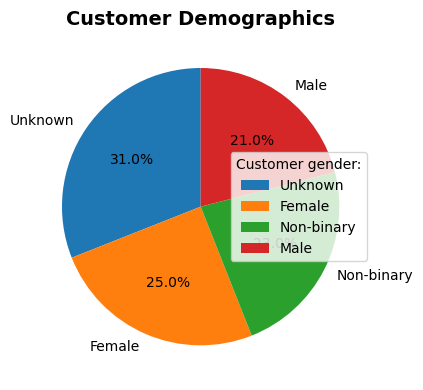

In [31]:
customer_counts = df['Customer demographics'].value_counts()
plt.figure(figsize=(6, 4))
plt.pie(customer_counts,labels=customer_counts.index, startangle=90, autopct='%1.1f%%')
plt.title('Customer Demographics',fontsize=14, fontweight='bold', loc='center')
plt.legend(title = "Customer gender:")
plt.tight_layout()
plt.show()

While Female buyers form the largest identifiable group, a substantial portion of the data is marked “Unknown,” which could obscure true demographic trends. Next, we examine how the gender breakdown varies across Product type:

  Product type  customer_count
0    cosmetics              26
1     haircare              34
2     skincare              40


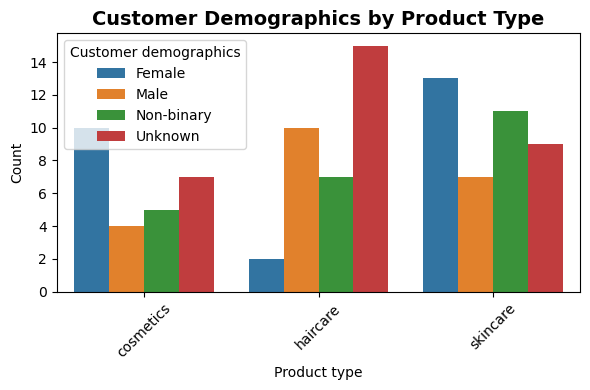

In [32]:
product_and_customer = df.groupby(['Product type', 'Customer demographics']).size().reset_index(name='Count')

# Print 
product_and_customer_totals = (
    product_and_customer
    .groupby('Product type', as_index=False)['Count']
    .sum()
    .rename(columns={'Count':'customer_count'})
)
print(product_and_customer_totals)

# Plot
plt.figure(figsize=(6, 4))
sns.barplot(data=product_and_customer, x='Product type', y='Count',hue='Customer demographics')
plt.title('Customer Demographics by Product Type',fontsize=14, fontweight='bold', loc='center')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

Key observations from the bar chart::
- **Cosmetics** (26 total):
  - Predominantly **Female** (10), with **Unknown** (7), **Non-binary** (5), and **Male** (4).  
  - The split suggests women are the main purchasers, but a large “Unknown” segment (≈27 %) could hide additional trends.
- **Haircare** (34 total):
  - Majority **Unknown** (15), followed by **Male** (10), **Non-binary** (7), and very few **Female** (2).  
  - The exceptionally high “Unknown” (≈44 %) and low female representation point to potential data quality issues or genuinely different buyer profiles.
- **Skincare** (40 total):
  - Highest number of **Female** customers (13), then **Non-binary** (11), **Unknown** (9), and **Male** (7).  
  - While women still lead, the gender distribution is more balanced here (Female ≈32 %, Non-binary ≈28 %, Unknown ≈23 %, Male ≈18 %).
##### <u>Refined Insight:</u>
- **Skincare** shows the strongest and most diversified gender engagement, making it ideal for targeted campaigns across multiple demographics.
- The large “Unknown” groups in **Cosmetics** and **Haircare** warrant data enrichment to uncover true customer profiles.
- Extremely low female representation in Haircare suggests either a niche male-dominated segment or misclassified data that should be investigated.


---
### Shipping and Logistics 
#### Question 4: What are the lead times per product type?


`Lead times` are crucial for inventory planning and customer satisfaction. To get a clear picture of how lead times vary across our product categories, I chose a box plot since it shows not just the average, but the full distribution, including outliers and variability.

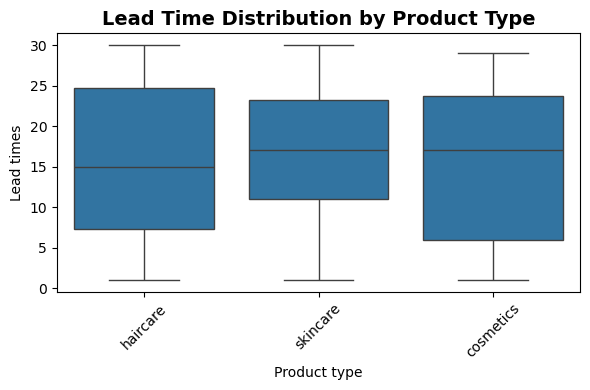

In [33]:
plt.figure(figsize=(6, 4))
sns.boxplot(data=df, x='Product type', y='Lead times')
plt.xticks(rotation=45)
plt.title('Lead Time Distribution by Product Type',fontsize=14, fontweight='bold', loc='center')
plt.tight_layout()
plt.show()

From the box plot, there are some interesting patterns that jump out:
- **Haircare** and **Cosmetics** show wide ranges of lead times, meaning there's a lot of variability in how long it takes to get these products. This could point to inconsistent supplier performance or maybe different sourcing strategies.
- **Skincare** and **Cosmetics** have the same highest median lead time, but here's the key insight - **Skincare** appears more stable. The tighter distribution suggests skincare suppliers are more predictable, even if they take a bit longer on average.

Let me dig into the actual numbers to be more specific:

In [34]:
lead_time_stats = df.groupby('Product type')['Lead times'].describe()
print(lead_time_stats)

              count       mean       std  min    25%   50%    75%   max
Product type                                                           
cosmetics      26.0  15.384615  9.291187  1.0   6.00  17.0  23.75  29.0
haircare       34.0  15.529412  9.189043  1.0   7.25  15.0  24.75  30.0
skincare       40.0  16.700000  8.259261  1.0  11.00  17.0  23.25  30.0


##### <u>Refined Insight:</u>
The lead time analysis reveals different operational challenges for each product category. While skincare takes longer on average, its consistency makes it easier to plan around. The high variability in haircare and cosmetics suggests these categories might benefit from supplier performance reviews or diversified sourcing strategies to reduce uncertainty.

This variability could also impact stock levels and customer satisfaction, which we have explored in the previous questions.

#### Question 5: Is there a significant correlation among logistics variables? 

To determine whether any linear relationships exist between our key `logistics metrics`-stock levels, lead times, order quantities, shipping times, and shipping costs-we compute a correlation matrix and display it as a heatmap.

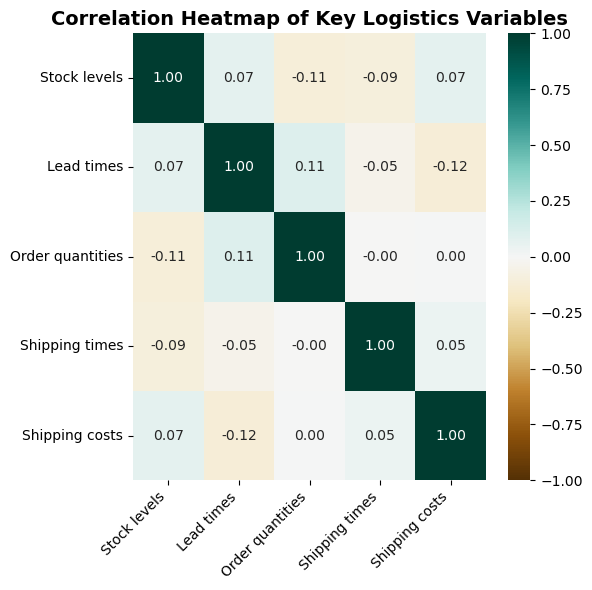

In [35]:
Logistics_var = ['Stock levels','Lead times','Order quantities','Shipping times','Shipping costs']
Logistics_var_matrix = df[Logistics_var].corr()

plt.figure(figsize=(6, 6))
sns.heatmap(data=Logistics_var_matrix,
            annot=True,
            cmap='BrBG',
            center=0,
            fmt=".2f",
            vmin=-1, vmax=1
            )
plt.title('Correlation Heatmap of Key Logistics Variables',fontsize=14, fontweight='bold', loc='center')
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

From the heatmap, all pairwise correlations fall between -0.12 and +0.11:
- The strongest positive correlation is between Lead times and Order quantities (≈0.11).
- The strongest negative correlation is between Lead times and Shipping costs (≈-0.12).
- All other metrics show very weak relationships (|r| < 0.10).
##### <u>Refined Insight:</u>
There are no meaningful linear correlations among these logistics variables. In other words, changes in one metric (e.g., lead time) do not directly predict changes in another (e.g., stock levels) within this dataset.

#### Question 6: What is the most optimal transportation mode ?

To identify the most efficient shipping option, we focus on two key metrics: `Shipping times` (faster is better) and `Shipping costs` (lower is better), and then combine them into a simple efficiency score. We normalize each metric into the [0, 1] range using min–max scaling:

$$
x_{normalized} = \frac{x - x_{min}}{x_{max} - x_{min}}
$$
Then we compute an **efficiency score** as:
$$
\text{Score} = 1 - (w_1 \cdot \text{norm(time)} + w_2 \cdot \text{norm(cost)})
$$
where we assign a higher weight to time (w₁ = 0.6) than cost (w₂ = 0.4) to reflect our priority on faster delivery.

In [36]:
x_time = df['Shipping times']
x_cost = df['Shipping costs']

df['Shipping times normalized'] = (x_time- min(x_time)) / (max(x_time) - min(x_time))
df['Shipping costs normalized'] = (x_cost- min(x_cost)) / (max(x_cost) - min(x_cost))

df['score'] = 1 - (0.6* df['Shipping times normalized'] + 0.4*df['Shipping costs normalized'])

transMode_score = df.groupby('Transportation modes').agg({'score': 'mean'})
print(transMode_score.sort_values(by='score',ascending=False))

                         score
Transportation modes          
Road                  0.548563
Air                   0.501138
Rail                  0.428686
Sea                   0.414649


From the results, **Road** achieves the highest average efficiency score of transportation modes, indicating it provides the best balance of speed and cost under our weighting scheme.
##### <u>Refined Insight:</u>
Prioritizing delivery speed (60 %) over cost (40 %) reveals road as the optimal transportation mode. If our priorities change (e.g., cost-focused), we can adjust the weights or include additional factors (e.g., reliability) in the same framework.

---
### Manufacturing 
#### Question 7: Which supplier delivers the highest production volume at the lowest cost?

To identify the best cost–volume trade-off among our suppliers, we plot each supplier’s `average manufacturing cost` against their `average production volume`.

               Production volumes  Manufacturing costs
Supplier name                                         
Supplier 1             501.666667            45.254027
Supplier 2             641.136364            41.622514
Supplier 3             533.133333            43.634121
Supplier 4             653.111111            62.709727
Supplier 5             521.166667            44.768243


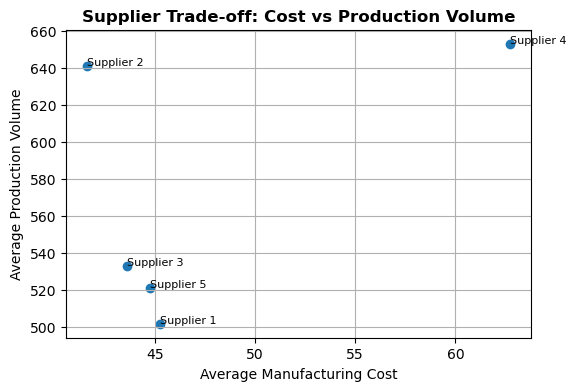

In [37]:
avg_metrics_by_supplier = df.groupby('Supplier name')[['Production volumes', 'Manufacturing costs']].mean()
print(avg_metrics_by_supplier)

plt.figure(figsize=(6, 4))
plt.scatter(avg_metrics_by_supplier['Manufacturing costs'], avg_metrics_by_supplier['Production volumes'])
for supplier, row in avg_metrics_by_supplier.iterrows():
    plt.text(row['Manufacturing costs'],row['Production volumes'],supplier,fontsize=8)
plt.xlabel('Average Manufacturing Cost')
plt.ylabel('Average Production Volume')
plt.title('Supplier Trade-off: Cost vs Production Volume',fontsize=12, fontweight='bold', loc='center')
plt.grid()
plt.show()

From the scatter plot:
- **Supplier 2** offers the lowest average cost (\~42 units\) while delivering one of the highest volumes (~640 units).

- **Supplier 4** achieves the highest volume (\~655 units\) but at a \~1.5× higher cost (\~63 units\) compared to Supplier 2.

- **Suppliers 1, 3, and 5** cluster around a mid-range cost (\~45 units\) and volume (\~520 units\), indicating similar performance.
##### <u>Refined Insight:</u>
Supplier 2 provides the most cost-effective production-high volume at the lowest cost-making it our optimal primary partner. Supplier 4 delivers only a marginal volume gain at substantially higher cost, so expanding with Supplier 2 or negotiating better terms with Supplier 4 may yield greater efficiency.

#### Question 8: Are defect rates correlated with manufacturing lead time or manufacturing cost?

Understanding what drives defect rates can help us target improvements. Below are two scatter plots that compare `Defect rates` against `Manufacturing costs` and `Manufacturing lead time`, respectively.  

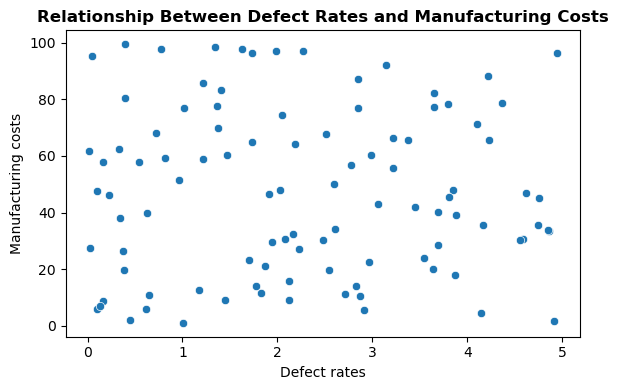

In [38]:
plt.figure(figsize=(6,4))
sns.scatterplot(data=df, x='Defect rates', y='Manufacturing costs')
plt.xlabel('Defect rates')
plt.ylabel('Manufacturing costs')
plt.title('Relationship Between Defect Rates and Manufacturing Costs',fontsize=12, fontweight='bold', loc='center')
plt.tight_layout()
plt.show()

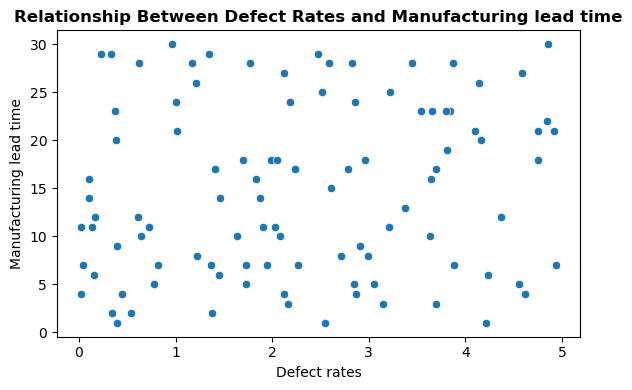

In [39]:
plt.figure(figsize=(6,4))
sns.scatterplot(data=df, x='Defect rates', y='Manufacturing lead time')
plt.xlabel('Defect rates')
plt.ylabel('Manufacturing lead time')
plt.title('Relationship Between Defect Rates and Manufacturing lead time',fontsize=12, fontweight='bold', loc='center')
plt.tight_layout()
plt.show()

From the two plots above:
- **Defect rates** span the full cost range (0-100) without any clear upward or downward trend.

- **High defect percentages** occur both at low and high costs-there is no visible “sweet spot” in cost that minimizes defects.

- Similarly, **defect rates** are scattered across lead times from near 0 days up to 30 days, showing no obvious relationship.
##### <u>Refined Insight:</u>
Defect rates appear independent of both manufacturing cost and lead time in this dataset. To confirm, we could compute Pearson or Spearman correlation coefficients or fit a simple regression model-but the scatter suggests any linear relationship is negligible.

#### Question 9: What percentage of products pass/fail inspection?

Lastly, We’ll use a pie chart to display the proportions of `Pass`, `Fail`, and `Pending` inspection results-revealing where quality control stands.

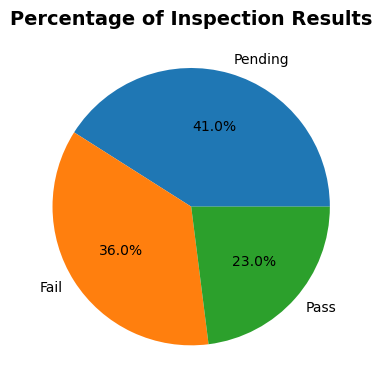

In [40]:
inspection_count = df['Inspection results'].value_counts()
inspection_percentage = inspection_count * 100/ inspection_count.sum()
inspection_percentage_df = inspection_percentage.reset_index()

plt.figure(figsize=(6,4))
plt.pie(
    inspection_percentage_df['count'],
    labels=inspection_percentage_df['Inspection results'],
    autopct='%.1f%%')
plt.title('Percentage of Inspection Results',fontsize=14, fontweight='bold', loc='center')
plt.tight_layout()
plt.show()

What we get from the chart:
- **Pending** inspections represent 41.0% of all records.
- **Fail** outcomes account for 36.0%, indicating a high failure rate.
- Only 23.0% of products **pass** the product inspection.
##### <u>Refined Insights:</u>
With nearly 77% of items either failing or awaiting review, there’s a significant opportunity to streamline production quality or expedite the inspection process. Investigating which product lines or suppliers contribute most to “Fail” and “Pending” cases could reveal targeted improvement areas.